In [8]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

from scipy.optimize import minimize
from sklearn.preprocessing import PolynomialFeatures

pd.set_option('display.notebook_repr_html', False)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 150)
pd.set_option('display.max_seq_items', None)
 
#%config InlineBackend.figure_formats = {'pdf',}
%matplotlib inline

import seaborn as sns
sns.set_context('notebook')
sns.set_style('white')

In [2]:
data = np.loadtxt('data1.txt',delimiter=',')

In [3]:
data

array([[ 34.62365962,  78.02469282,   0.        ],
       [ 30.28671077,  43.89499752,   0.        ],
       [ 35.84740877,  72.90219803,   0.        ],
       [ 60.18259939,  86.3085521 ,   1.        ],
       [ 79.03273605,  75.34437644,   1.        ],
       [ 45.08327748,  56.31637178,   0.        ],
       [ 61.10666454,  96.51142588,   1.        ],
       [ 75.02474557,  46.55401354,   1.        ],
       [ 76.0987867 ,  87.42056972,   1.        ],
       [ 84.43281996,  43.53339331,   1.        ],
       [ 95.86155507,  38.22527806,   0.        ],
       [ 75.01365839,  30.60326323,   0.        ],
       [ 82.30705337,  76.4819633 ,   1.        ],
       [ 69.36458876,  97.71869196,   1.        ],
       [ 39.53833914,  76.03681085,   0.        ],
       [ 53.97105215,  89.20735014,   1.        ],
       [ 69.07014406,  52.74046973,   1.        ],
       [ 67.94685548,  46.67857411,   0.        ],
       [ 70.66150955,  92.92713789,   1.        ],
       [ 76.97878373,  47.57596

In [4]:
print 'Dimensions:',data.shape

Dimensions: (100, 3)


In [5]:
X = np.c_[np.ones((data.shape[0],1)),data[:,0:2]]
y = np.c_[data[:,2]]

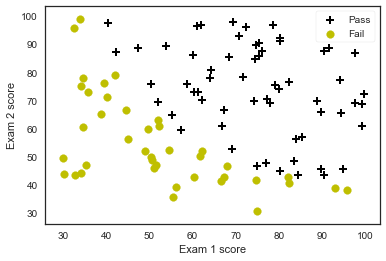

In [7]:
neg = data[:,2] == 0
pos = data[:,2] == 1
axes = plt.gca()
axes.scatter(data[pos][:,0], data[pos][:,1], marker='+', c='k', s=60, linewidth=2, label='Pass')
axes.scatter(data[neg][:,0], data[neg][:,1], c='y', s=60, label='Fail')
axes.set_xlabel('Exam 1 score')
axes.set_ylabel('Exam 2 score')
axes.legend(frameon= True, fancybox = True);

In [30]:
def sigmoid(z):
    return ( 1 / ( 1 + np.exp(-z)))

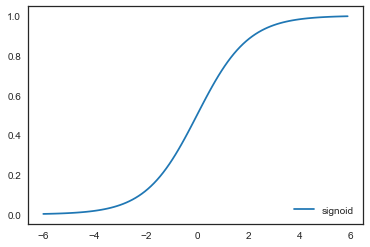

In [32]:
#展示sigmoid函数
index=np.arange(0,100)
xx=index*(12.0/100.0)-6.0
yy=sigmoid(xx)
plt.plot(xx,yy,label='signoid')
plt.legend(loc=4)

In [36]:
def costFunction(theta, X, y):
    m = y.size
    h = sigmoid(X.dot(theta))
    J = -1.0*(1.0/m)*(np.log(h).T.dot(y)+np.log(1-h).T.dot(1-y))
    if np.isnan(J[0]):
        return (np.inf)
    return J[0]

In [37]:
def gradient(theta, X, y):
    m = y.size
    h = sigmoid(X.dot(theta.reshape(-1,1)))
    grad =(1.0/m)*X.T.dot(h-y)
    return(grad.flatten())

In [40]:
initial_theta = np.zeros(X.shape[1])
res = minimize(costFunction, initial_theta, args=(X,y), jac=gradient, options={'maxiter':400})
res
#x表示theta的值由于有两个自变量，有3个theta值

c:\python27\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.


      fun: 0.20349770158950983
 hess_inv: array([[  2.85339493e+03,  -2.32908823e+01,  -2.27416470e+01],
       [ -2.32908823e+01,   2.04489131e-01,   1.72969525e-01],
       [ -2.27416470e+01,   1.72969525e-01,   1.96170322e-01]])
      jac: array([ -2.68557639e-09,   4.36433475e-07,  -1.39671758e-06])
  message: 'Optimization terminated successfully.'
     nfev: 34
      nit: 25
     njev: 30
   status: 0
  success: True
        x: array([-25.16131634,   0.2062316 ,   0.20147143])

In [42]:
#预测（类别，第一次成绩，第二次成绩）的概率
sigmoid(np.array([1, 45, 85]).dot(res.x.T))

0.77629032493310179

2500
[  2.77029500e-06   3.71581247e-06   4.98403883e-06 ...,   9.99999611e-01
   9.99999710e-01   9.99999784e-01]
2500
[[  2.77029500e-06   3.71581247e-06   4.98403883e-06 ...,   7.31988895e-01
    7.85562452e-01   8.30900942e-01]
 [  3.66797718e-06   4.91987719e-06   6.59905447e-06 ...,   7.83371706e-01
    8.29072602e-01   8.66771919e-01]
 [  4.85654153e-06   6.51410219e-06   8.73739123e-06 ...,   8.27228603e-01
    8.65268535e-01   8.95986136e-01]
 ..., 
 [  5.97667264e-01   6.65833268e-01   7.27711737e-01 ...,   9.99999317e-01
    9.99999491e-01   9.99999620e-01]
 [  6.62944161e-01   7.25136767e-01   7.79667732e-01 ...,   9.99999484e-01
    9.99999616e-01   9.99999713e-01]
 [  7.22546730e-01   7.77433826e-01   8.24106135e-01 ...,   9.99999611e-01
    9.99999710e-01   9.99999784e-01]]


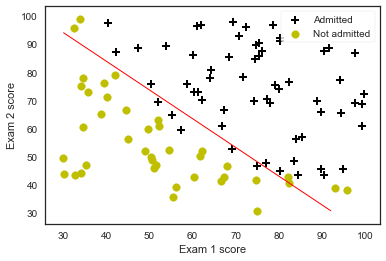

In [79]:
#绘制散点图
neg = data[:,2] == 0
pos = data[:,2] == 1
axes = plt.gca()
axes.scatter(data[pos][:,0], data[pos][:,1], marker='+', c='k', s=60, linewidth=2, label='Admitted')
axes.scatter(data[neg][:,0], data[neg][:,1], c='y', s=60, label='Not admitted')
axes.set_xlabel('Exam 1 score')
axes.set_ylabel('Exam 2 score')
axes.legend(frameon= True, fancybox = True)
#绘制拟合直线
x1_min, x1_max = X[:,1].min(), X[:,1].max()
x2_min, x2_max = X[:,2].min(), X[:,2].max()
xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max),np.linspace(x2_min, x2_max))
h = sigmoid(np.c_[np.ones((xx1.ravel().shape[0],1)),xx1.ravel(),xx2.ravel()].dot(res.x))
print h.size
print h
h = h.reshape(xx1.shape) #按照xx1的形状
print h.size
print h
plt.contour(xx1,xx2,h,[0.5], linewidths=1, colors='r')

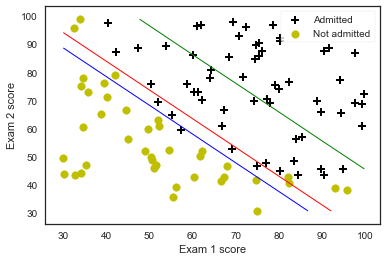

In [87]:
axes_1 = plt.gca()
axes_1.scatter(data[pos][:,0], data[pos][:,1], marker='+', c='k', s=60, linewidth=2, label='Admitted')
axes_1.scatter(data[neg][:,0], data[neg][:,1], c='y', s=60, label='Not admitted')
axes_1.set_xlabel('Exam 1 score')
axes_1.set_ylabel('Exam 2 score')
axes_1.legend(frameon= True, fancybox = True)
plt.contour(xx1,xx2,h,[0.25], linewidths=1, colors='b')
plt.contour(xx1,xx2,h,[0.5], linewidths=1, colors='r')
plt.contour(xx1,xx2,h,[0.99], linewidths=1, colors='g')

In [71]:
def predict(theta, X):  
    '''''Predict label using learned logistic regression parameters'''
    m, n = X.shape  
    p = np.zeros(shape=(m,1))  
    h = sigmoid(X.dot(theta.T))  
    for it in range(0, h.shape[0]):  
        if h[it]>0.5:  
            p[it,0]=1  
        else:  
            p[it,0]=0  
    return p  
#Compute accuracy on our training set  
p = predict(res.x, X)  
print'Train Accuracy: %f'%((y[np.where(p == y)].size / float(y.size))*100.0)

Train Accuracy: 89.000000
